# Explore here

In [157]:
# Your code here
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import chi2
from sklearn.preprocessing import FunctionTransformer
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler
from lazypredict.Supervised import LazyRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import *
from sklearn.ensemble import BaggingRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
import joblib








In [158]:

df = pd.read_csv('/workspaces//pauline---Ejercicio-y-Tutorial-de-Regresion-Logistica/data/raw/bank-marketing-campaign-data.csv', sep= ';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no


In [159]:
#Queremos conocer dimensión del DF:
df.shape

(41188, 21)

In [160]:
#Tipo de data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [161]:
# chequeamos :
df.isnull().mean()*100

age              0.00
job              0.00
marital          0.00
education        0.00
default          0.00
housing          0.00
loan             0.00
contact          0.00
month            0.00
day_of_week      0.00
duration         0.00
campaign         0.00
pdays            0.00
previous         0.00
poutcome         0.00
emp.var.rate     0.00
cons.price.idx   0.00
cons.conf.idx    0.00
euribor3m        0.00
nr.employed      0.00
y                0.00
dtype: float64

No hay ningun NaN. 

In [162]:
n_unicos = df.nunique()
n_unicos

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

In [163]:
# Revisamos que no haya fila duplicada:
sum(df.duplicated())

12

In [164]:
#Hay 12, entonces buscamos cuales son : 

df[df.duplicated()==True]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.40,93.92,-42.70,4.97,5228.10,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.40,93.92,-42.70,4.96,5228.10,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.40,93.92,-42.70,4.96,5228.10,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.40,93.92,-42.70,4.97,5228.10,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.40,93.44,-36.10,4.96,5228.10,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.40,93.44,-36.10,4.97,5228.10,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.10,93.20,-42.00,4.15,5195.80,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.80,93.08,-47.10,1.42,5099.10,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,4,999,0,nonexistent,-1.80,92.89,-46.20,1.31,5099.10,no


In [165]:
#Y doble chequeo, para imprimirlas todas, para estar seguros que son exactamente iguales, la fila entera:
print(df[df.duplicated(keep=False)])

       age          job   marital            education  default housing loan  \
1265    39  blue-collar   married             basic.6y       no      no   no   
1266    39  blue-collar   married             basic.6y       no      no   no   
12260   36      retired   married              unknown       no      no   no   
12261   36      retired   married              unknown       no      no   no   
14155   27   technician    single  professional.course       no      no   no   
14234   27   technician    single  professional.course       no      no   no   
16819   47   technician  divorced          high.school       no     yes   no   
16956   47   technician  divorced          high.school       no     yes   no   
18464   32   technician    single  professional.course       no     yes   no   
18465   32   technician    single  professional.course       no     yes   no   
20072   55     services   married          high.school  unknown      no   no   
20216   55     services   married       

In [166]:
#Las borramos : 
df.drop(df[df.duplicated() == True].index, axis=0, inplace=True)

# Revisamos ue se hayan eleminadas, y que solo se ha quitado 12 líneas y no 24 :
print(sum(df.duplicated()))
print(df.shape)



0
(41176, 21)


In [167]:
# La meta = identificar a los clientes que tienen una mayor probabilidad de contratar un un prestamo
# Eliminamos columnas que no son relevantes o útiles o para el objectivo : 

# En ese caso : 
# Contact: Vemos que solo hay 2 datos unicos, buscamos cuales son y el %: 
print(df['contact'].value_counts())

# Telephone y cellular son sinonimos, el metodo de contacto es el mismo entonces no es relevante para el objectivo, borramos :
df.drop(['contact'], axis=1, inplace=True)

#Nos queda esas columnas: 
print(df.columns.str.strip())
print(df.shape)



contact
cellular     26135
telephone    15041
Name: count, dtype: int64
Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y'],
      dtype='object')
(41176, 20)


In [168]:
#Descripción básica :
df.describe(include="all").T.round(1)


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,41176.00,NaN,NaN,NaN,40.02,10.42,17.00,32.00,38.00,47.00,98.00
job,41176,12,admin.,10419,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,41176,4,married,24921,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,41176,8,university.degree,12164,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,41176,3,no,32577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
housing,41176,3,yes,21571,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,41176,3,no,33938,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,41176,10,may,13767,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day_of_week,41176,5,thu,8618,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,41176.00,NaN,NaN,NaN,258.32,259.31,0.00,102.00,180.00,319.00,4918.00


Análisis de variables univariante

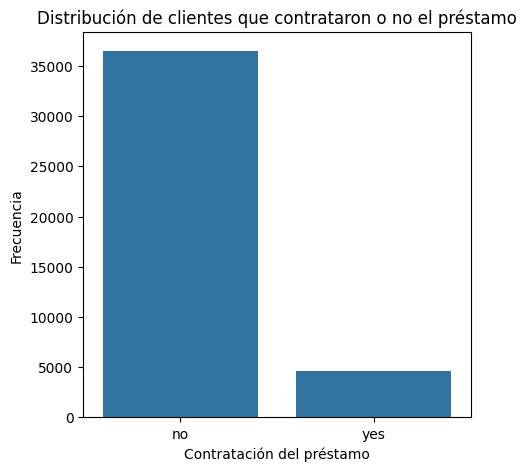

y
no    88.73
yes   11.27
Name: proportion, dtype: float64


In [169]:
# Visualizamos primero la distribución de nuestra target y su %:

plt.figure(figsize=(5, 5))
sns.countplot(x='y', data=df)
plt.title('Distribución de clientes que contrataron o no el préstamo')
plt.xlabel('Contratación del préstamo')
plt.ylabel('Frecuencia')

plt.show()
print(df['y'].value_counts(normalize=True) * 100)

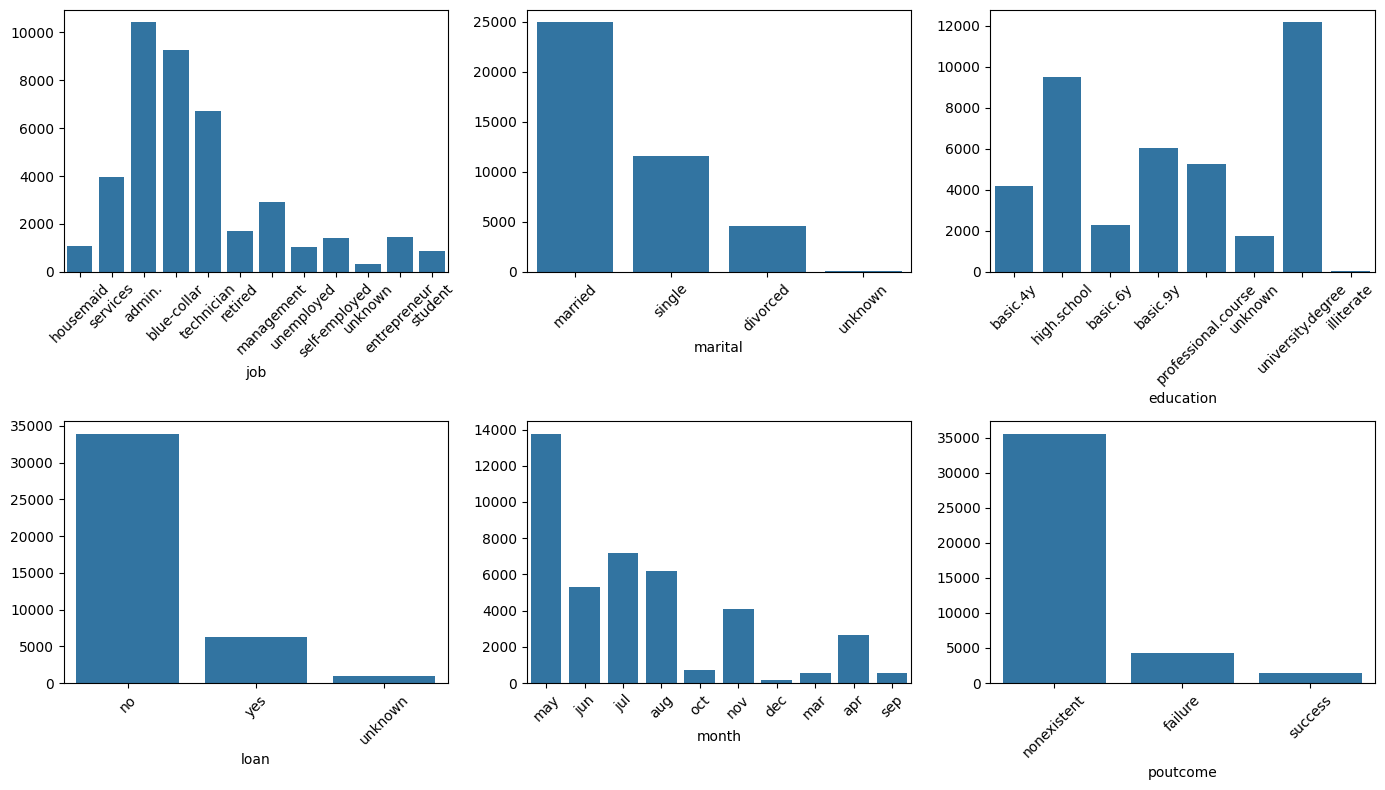

In [170]:
# Variables categóricas:
fig, axis = plt.subplots(2, 3, figsize=(14, 8))
sns.countplot(ax=axis[0, 0], data=df, x="job").set_ylabel(None)
sns.countplot(ax=axis[0, 1], data=df, x="marital").set_ylabel(None)
sns.countplot(ax=axis[0, 2], data=df, x="education").set_ylabel(None)
sns.countplot(ax=axis[1, 0], data=df, x="loan").set_ylabel(None)
sns.countplot(ax=axis[1, 1], data=df, x="month").set_ylabel(None)
sns.countplot(ax=axis[1, 2], data=df, x="poutcome").set_ylabel(None)

# Ajustar las etiquetas :
for x in axis.flatten():
    for label in x.get_xticklabels():
        label.set_rotation(45)  
        label.set_fontsize(10)  

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()


In [171]:
#Poutcome : Vemos que un gran mayoría está "nonexistent" que no es 0 ni NaN pero que son igualmente data faltante :
print(df['poutcome'].value_counts())

#Faltan más de 85%, borramos esa columna porque es irrelevante entonces para nuestro modelp :
df.drop(['poutcome'], axis=1, inplace=True)


poutcome
nonexistent    35551
failure         4252
success         1373
Name: count, dtype: int64


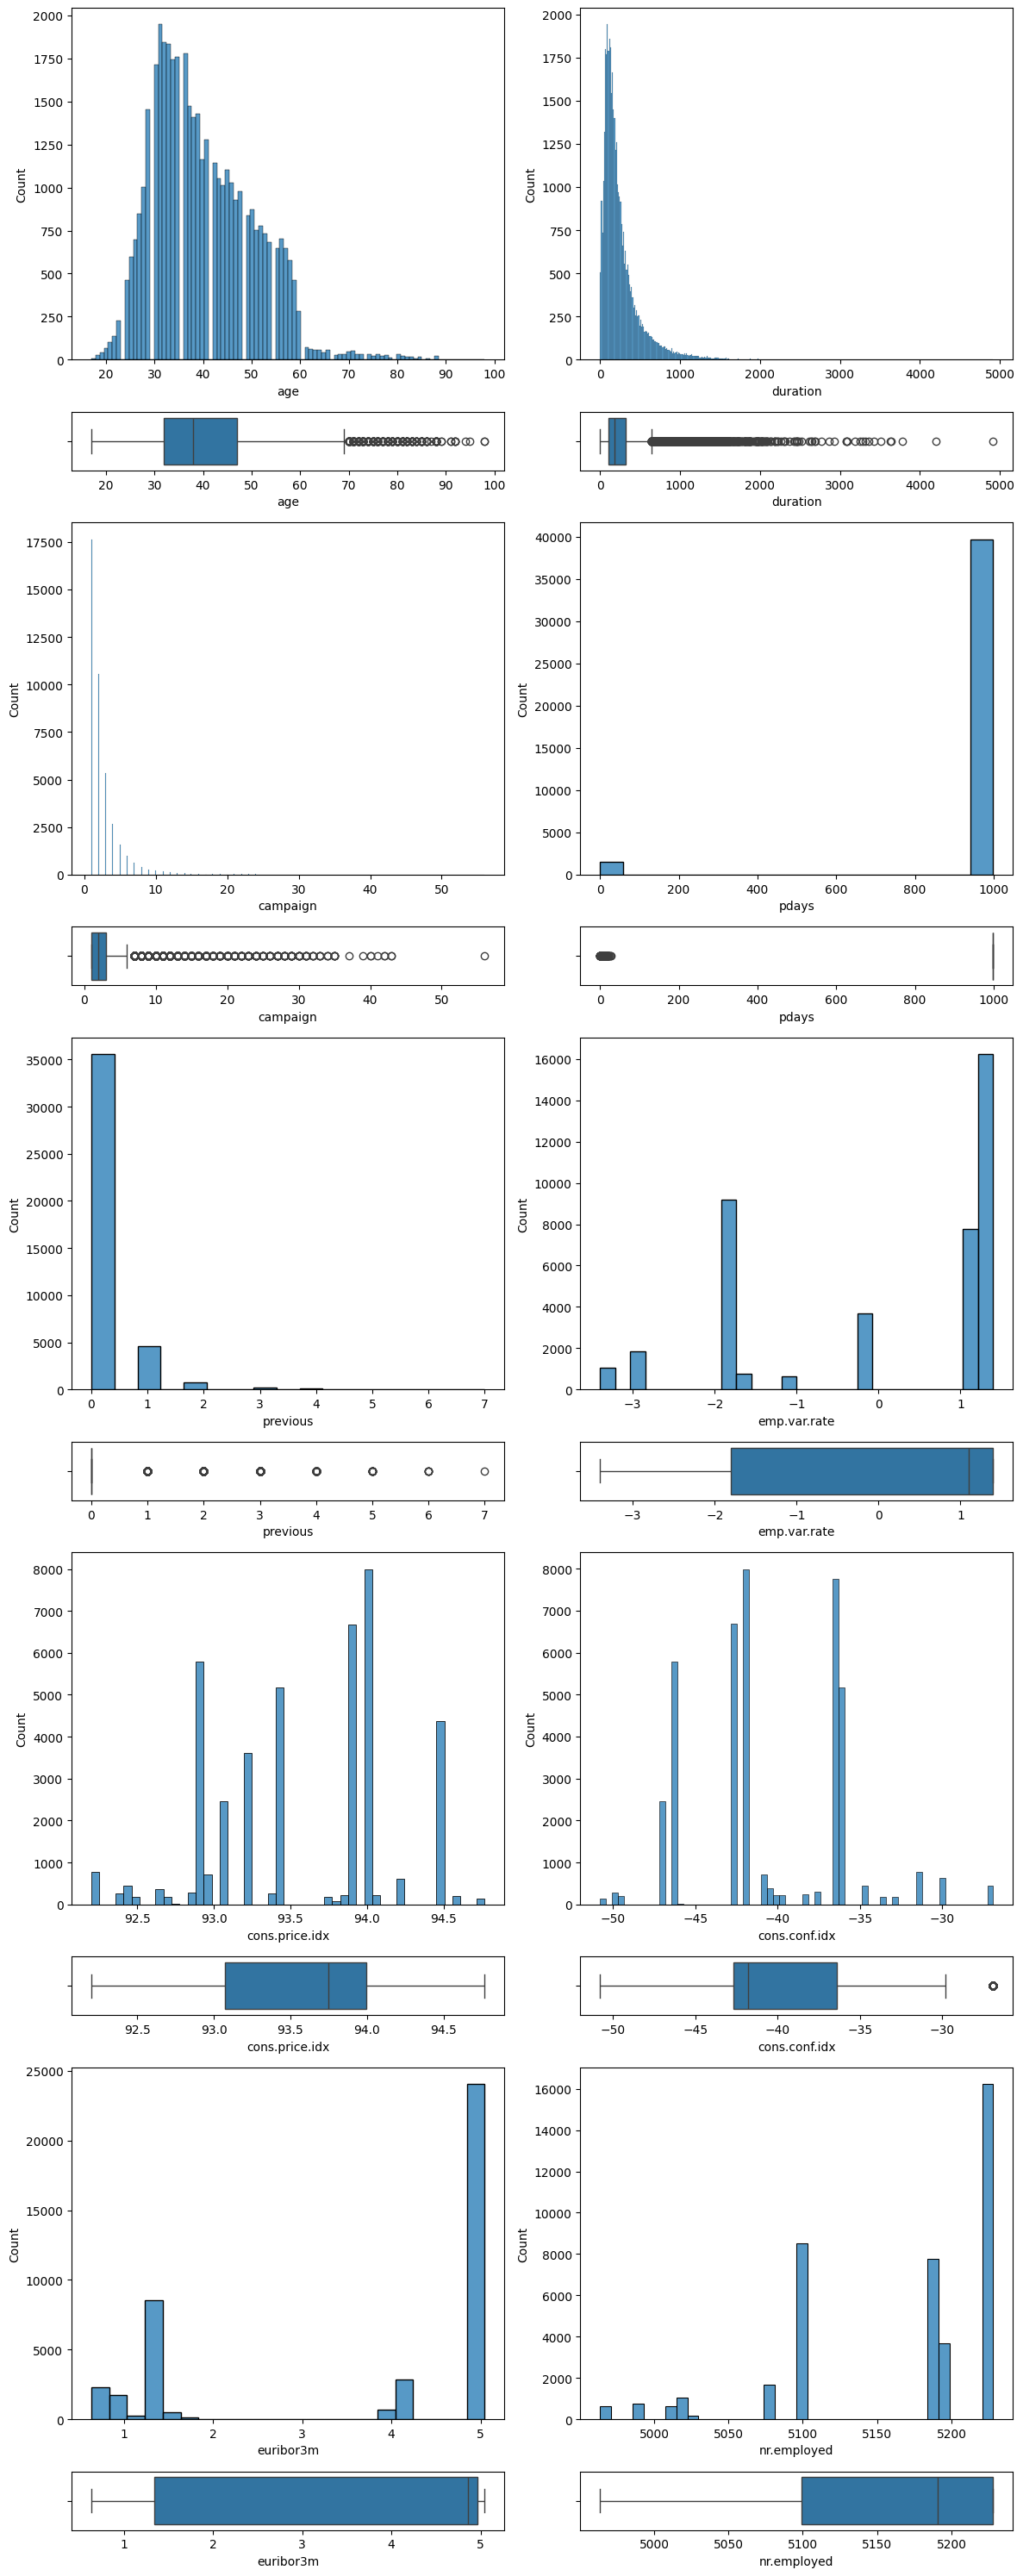

In [172]:
# Variables numéricas:

fig, axis = plt.subplots(10, 2, figsize=(12, 30), gridspec_kw={"height_ratios": [6, 1] * 5})

sns.histplot(ax=axis[0, 0], data=df, x="age")
sns.boxplot(ax=axis[1, 0], data=df, x="age")

sns.histplot(ax=axis[0, 1], data=df, x="duration")
sns.boxplot(ax=axis[1, 1], data=df, x="duration")

sns.histplot(ax=axis[2, 0], data=df, x="campaign")
sns.boxplot(ax=axis[3, 0], data=df, x="campaign")

sns.histplot(ax=axis[2, 1], data=df, x="pdays")
sns.boxplot(ax=axis[3, 1], data=df, x="pdays")


sns.histplot(ax=axis[4, 0], data=df, x="previous")
sns.boxplot(ax=axis[5, 0], data=df, x="previous")

sns.histplot(ax=axis[4, 1], data=df, x="emp.var.rate")
sns.boxplot(ax=axis[5, 1], data=df, x="emp.var.rate")

sns.histplot(ax=axis[6, 0], data=df, x="cons.price.idx")
sns.boxplot(ax=axis[7, 0], data=df, x="cons.price.idx")

sns.histplot(ax=axis[6, 1], data=df, x="cons.conf.idx")
sns.boxplot(ax=axis[7, 1], data=df, x="cons.conf.idx")

sns.histplot(ax=axis[8, 0], data=df, x="euribor3m")
sns.boxplot(ax=axis[9, 0], data=df, x="euribor3m")

sns.histplot(ax=axis[8, 1], data=df, x="nr.employed")
sns.boxplot(ax=axis[9, 1], data=df, x="nr.employed")


plt.tight_layout()


plt.show()



In [173]:
#Duration : eliminamos llamadas son más de 3000 seg, que hay muy pocas y que no tienen sentidos, son casí 1 hora, debe ser un errores como llamadas que coren sobre contestador.
df = df[df["duration"] <= 3000]

#Campaign : eliminamos más de 30 contactos, que es demasiado contactos, deben ser errores
df = df[df["campaign"] <= 30]

#pdays : eliminamos la columna porque casi tienen todos el mismo valor, no da ninguna información
df = df.drop(columns=["pdays"])

#previous : eliminamos a más de 5 contactos
df = df[df["previous"] <= 5]

#Nos queda :
print(df.shape)

(41122, 18)


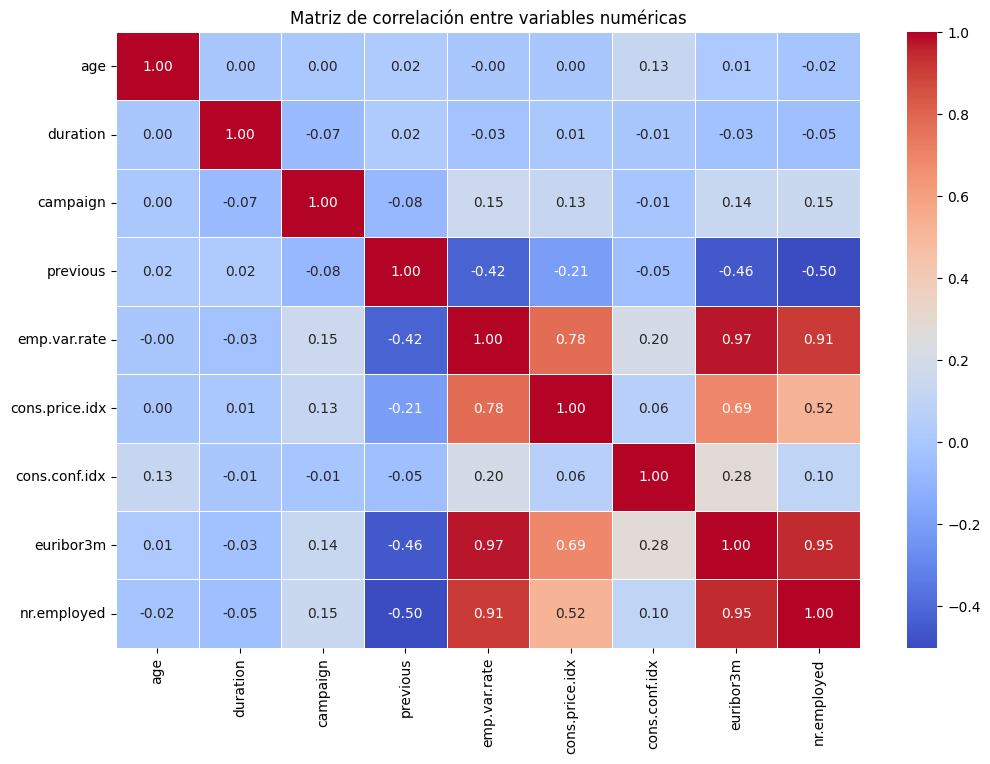

In [174]:
# Matriz de correlación de variables numéricas
num_vars = df.select_dtypes(include=['number']).columns

correlation_matrix = df[num_vars].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de correlación entre variables numéricas')
plt.show()

Notamos correlación fuerte entre las variaciones del contaxto macro, que es bastante lógico porque están todas relacionadas : 
- emp.var.rate. Tasa de variación del empleo. Indicador trimestral (numérico)
- cons.price.idx. Índice de precios al consumidor. Indicador mensual (numérico)
- cons.conf.idx. Índice de confianza del consumidor. Indicador mensual (numérico)
- euribor3m. Tasa EURIBOR 3 meses. Indicador diario (numérico)
- nr.employed. Número de empleados. Indicador trimestral (numérico)

Y también notamos una correlación negativa importante entre pdays y previous. Se puede interpretard que si un cliente ha tenido pocos contactos previos (previous es bajo), es más probable que haya pasado más tiempo desde su último contacto en la campaña anterior (pdays es alto). Pdría significar que el cliente no fue tan relevante en las campañas anteriores

In [175]:
#Definimos X e Y para dividir el data set entre set y train
X = df.drop(['y'], axis=1) 
y = df['y'] 

# Convertir las etiquetas 'yes'/'no' en valores numéricos (1, 0)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Selección de caracteristicas :

In [176]:
#Usamos xgb para conocer la importancia de las características, vamos a usar xgb.XGBClassifier equivalente de XGBRegressor pero para modelos de clasification :

#Primero tenemos que convertir las columnas categóricas a tipo 'category' sino me salía error :"DataFrame.dtypes for data must be int, float, bool or category."
categorical_columns = X_train.select_dtypes(include=['object']).columns
for col in categorical_columns:
    X_train[col] = X_train[col].astype('category')
    X_test[col] = X_test[col].astype('category')

#Definir el model (enable_categorical=Ture --> gracias a eso no hay necesidad de convertir valores categoricas en valores numéricos) :
xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42, enable_categorical=True)

#Entrenar el modelo
xgb_model.fit(X_train, y_train) #Usamos datos de entrenamiento para ser lo más imparcial posible 

#Importancia :
df_imp = pd.DataFrame({'Feature': X_train.columns, 'Importance': xgb_model.feature_importances_ * 100})
df_imp = df_imp.sort_values(by='Importance', ascending=False)
print(df_imp)

           Feature  Importance
16     nr.employed       75.86
9         duration        5.43
12    emp.var.rate        3.48
7            month        2.50
15       euribor3m        1.59
4          default        1.30
13  cons.price.idx        1.21
8      day_of_week        1.06
1              job        1.04
11        previous        1.02
3        education        0.91
10        campaign        0.86
14   cons.conf.idx        0.82
6             loan        0.80
0              age        0.78
2          marital        0.68
5          housing        0.66


In [177]:
df_imp[df_imp.Importance>1]['Feature'].values

array(['nr.employed', 'duration', 'emp.var.rate', 'month', 'euribor3m',
       'default', 'cons.price.idx', 'day_of_week', 'job', 'previous'],
      dtype=object)

In [178]:
# Seleccionamos las características que presentan más de un 1% de importancia
X_train = X_train[df_imp[df_imp.Importance>1]['Feature'].values]
X_test = X_test[df_imp[df_imp.Importance>1]['Feature'].values]

Analisamos correlación 

In [179]:
#Primero hay que convertir las variables categóricas a variables numéricas usando LabelEncoding

#Separamos columnas categóricas y numéricas, cat ya existía, pero se cambió a category y no object : 
categorical_columns = X_train.select_dtypes(include=['object','category']).columns
numerical_columns = X_train.select_dtypes(exclude=['object','category']).columns

#Creamos el transformador para LabelEncoder (para columnas categóricas) y MinMaxScaler (para las columnas numéricas)
encoder = LabelEncoder()
scaler = MinMaxScaler()

# Convertimos las columnas categóricas usando LabelEncoder
for col in categorical_columns:
    X_train[col] = encoder.fit_transform(X_train[col])

# Normalizamos las columnas numéricas
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])

#Ahora, X_train está procesado y listo para usar
print(X_train.head())

       nr.employed  duration  emp.var.rate  month  euribor3m  default  \
24882         0.88      0.03          0.69      7       0.80        0   
29895         0.51      0.00          0.33      0       0.17        0   
22601         1.00      0.08          1.00      1       0.98        1   
3491          0.86      0.09          0.94      6       0.96        0   
8030          1.00      0.08          1.00      4       0.96        1   

       cons.price.idx  day_of_week  job  previous  
24882            0.39            3    0      0.00  
29895            0.34            1    1      0.00  
22601            0.48            0    0      0.00  
3491             0.70            2    9      0.00  
8030             0.88            1    5      0.00  


VIF

- VIF = 1: No hay correlación entre la variable y otras variables.
- VIF > 1: Hay alguna correlación entre la variable y otras variables, pero no es un problema.
- VIF > 5 o 10: Significa que la variable tiene una correlación alta con otras variables, lo cual puede indicar un problema de multicolinealidad. Las variables con un VIF muy alto pueden causar inestabilidad en el modelo, haciendo que sea difícil interpretar los coeficientes del modelo y que la precisión de las predicciones sea reducida.

In [180]:
X_train.corr()

,nr.employed,duration,emp.var.rate,month,euribor3m,default,cons.price.idx,day_of_week,job,previous
nr.employed,1.00,-0.05,0.91,-0.22,0.95,0.19,0.52,0.03,-0.02,-0.50
duration,-0.05,1.00,-0.03,0.00,-0.04,-0.01,0.00,0.02,-0.01,0.02
emp.var.rate,0.91,-0.03,1.00,-0.18,0.97,0.21,0.78,0.03,-0.01,-0.42
month,-0.22,0.00,-0.18,1.00,-0.11,-0.02,-0.00,0.03,-0.03,0.10
euribor3m,0.95,-0.04,0.97,-0.11,1.00,0.20,0.69,0.04,-0.01,-0.45
default,0.19,-0.01,0.21,-0.02,0.20,1.00,0.17,-0.01,-0.03,-0.10
cons.price.idx,0.52,0.00,0.78,-0.00,0.69,0.17,1.00,0.01,-0.02,-0.21
day_of_week,0.03,0.02,0.03,0.03,0.04,-0.01,0.01,1.00,0.00,-0.00
job,-0.02,-0.01,-0.01,-0.03,-0.01,-0.03,-0.02,0.00,1.00,0.03
previous,-0.50,0.02,-0.42,0.10,-0.45,-0.10,-0.21,-0.00,0.03,1.00


In [181]:
vif = pd.Series([variance_inflation_factor(X_train.corr().values, i) for i in range(X_train.corr().shape[1])], index=X_train.columns)
vif

nr.employed      1620.52
duration            1.04
emp.var.rate     8512.64
month              25.06
euribor3m        9014.81
default             1.42
cons.price.idx    307.86
day_of_week         1.09
job                 1.18
previous            4.36
dtype: float64

<Axes: >

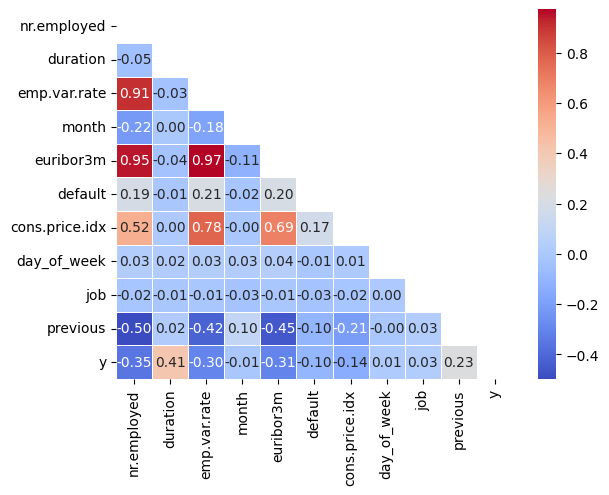

In [182]:
X_corr = X_train.copy()
X_corr['y'] = y_train
corr = X_corr.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')


Variables con VIF muy alto, alta correlación con otras variables:
- nr.employed (1620.52)
- emp.var.rate (8512.64)
- euribor3m (9014.81)
- cons.price.idx (307.86)
- month (25.05)

In [183]:
#nr.employed y emp.var.rate : las 2 tratan de datos macro sobre el empleo, las juntamos

X_train['empleo'] = X_train['nr.employed'] * X_train['emp.var.rate']
X_test['empleo'] = X_test['nr.employed'] * X_test['emp.var.rate']

#Eliminar las columnas originales
X_train.drop(['nr.employed', 'emp.var.rate'], axis=1, inplace=True)
X_test.drop(['nr.employed', 'emp.var.rate'], axis=1, inplace=True)

#cons.price.idx y euribor3m: son indicadores economicos relevante, los juntamos

X_train['ind_eco'] = X_train['euribor3m'] * X_train['cons.price.idx']
X_test['ind_eco'] = X_test['euribor3m'] * X_test['cons.price.idx']

# Eliminar las columnas originales
X_train.drop(['euribor3m', 'cons.price.idx'], axis=1, inplace=True)
X_test.drop(['euribor3m', 'cons.price.idx'], axis=1, inplace=True)

In [184]:
vif = pd.Series([variance_inflation_factor(X_train.corr().values, i) for i in range(X_train.corr().shape[1])], index=X_train.columns)
vif

duration        1.04
month           6.84
default         1.26
day_of_week     1.07
job             1.03
previous        2.68
empleo        335.40
ind_eco       295.29
dtype: float64

In [185]:
#Seguimos con empleo e ind_eco muy alto, al final son todos data del contexto economico, pues las juntamos todas :

X_train['eco_context'] = X_train['ind_eco'] * X_train['empleo']
X_test['eco_context'] = X_test['ind_eco'] * X_test['empleo']

X_train.drop(['ind_eco', 'empleo'], axis=1, inplace=True)
X_test.drop(['ind_eco', 'empleo'], axis=1, inplace=True)

#Volvemos a chequear VIF:
vif = pd.Series([variance_inflation_factor(X_train.corr().values, i) for i in range(X_train.corr().shape[1])], index=X_train.columns)
print(vif)


duration      1.01
month         1.14
default       1.21
day_of_week   1.01
job           1.01
previous      2.01
eco_context   2.37
dtype: float64


Chi-2 también evalúa si hay una dependencia estadística significativa entre las variables independientes (X_train) y la variable dependiente y_train, la target.

Variables + importante = Las que tienen una alta estadística Chi2 y un p-value cerca 0: 
Estas variables están muy relacionadas con la target y, son relevantes para la predicción.

Variables - importantes = Las que tienen una estadística Chi2 baja y un p-value alto. No aportan mucho a la predicción.

--> Can be used to select the n_features features with the highest values for the test chi-squared statistic from X, which must contain only non-negative integer feature values such as booleans or frequencies e.g., term counts in document classification), relative to the classes.

In [186]:
#Aplicamos entonces chi2 de sklearn 
chi2_stats, p_values = chi2(X_train, y_train)
chi2_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Chi2 Stat': chi2_stats,
    'p-value': p_values
}).sort_values(by='Chi2 Stat', ascending=False)

print(chi2_df)




       Feature  Chi2 Stat  p-value
6  eco_context     522.67     0.00
0     duration     478.13     0.00
5     previous     469.61     0.00
2      default     252.83     0.00
4          job      76.53     0.00
3  day_of_week       6.98     0.01
1        month       1.93     0.16


Mantener variables con Chi2 Stat alto y p-value bajo: eco_context, duration, previous, default, job, son todas significativas y deben mantenerse en el modelo.

Eliminar variables con Chistat bajo y p-value alto: month 

***duda con*** day_of_week: Aunque su Chi2 Stat es más bajo, el p-value sugiere que day_of_week podría ser importante, la guardamos

In [187]:
#Eliminamos month :
X_train.drop(['month'], axis=1, inplace=True)
X_test.drop(['month'], axis=1, inplace=True)


Escalado de variables:

In [188]:
# Identificar las variables binarias
binary_cols = X_train[(X_train == 0)|(X_train == 1)].dropna(axis=1).columns
binary_cols

Index([], dtype='object')

In [189]:
#No hay pues lo haremos de frente con X_train
X_train

,duration,default,day_of_week,job,previous,eco_context
24882,0.03,0,3,0,0.00,0.19
29895,0.00,0,1,1,0.00,0.01
22601,0.08,1,0,0,0.00,0.48
3491,0.09,0,2,9,0.00,0.54
8030,0.08,1,1,5,0.00,0.85
...,...,...,...,...,...,...
6274,0.04,1,3,1,0.00,0.54
11302,0.14,0,2,4,0.00,0.87
38216,0.06,0,4,0,0.20,0.00
860,0.10,0,4,4,0.00,0.54


In [190]:
# Ahora puedes aplicar el MinMaxScaler a los datos
scaler = MinMaxScaler()

# Transformar las columnas numéricas con el escalador
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

# Verifica los primeros 5 registros después de la normalización
print(X_train_sc[:5])

ValueError: could not convert string to float: 'no'

In [156]:
# ValueError: could not convert string to float: 'no' ---> NOENTIENDOOOO Contar cuántas veces aparece 'no' en todo el DataFrame
count_no = (X_train == 'no').sum().sum()
print(f"El valor 'no' aparece {count_no} veces en X_train.")

El valor 'no' aparece 0 veces en X_train.


Selección del algoritmo regresivo

In [73]:
#reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
#models, predictions = reg.fit(X_train_sc, X_test_sc, y_train, y_test)

'''se colapso aqui :  21%|██▏       | 9/42 [00:03<00:15,  2.19it/s]
GammaRegressor model failed to execute
Some value(s) of y are out of the valid range of the loss 'HalfGammaLoss'.
GaussianProcessRegressor model failed to execute
Unable to allocate 8.06 GiB for an array with shape (32897, 32897) and data type float64
 36%|███▌      | 15/42 [00:06<00:12,  2.10it/s]
KernelRidge model failed to execute
Unable to allocate 8.06 GiB for an array with shape (32897, 32897) and data type float64
 60%|█████▉    | 25/42 [00:19<00:02,  6.14it/s]'''


"se colapso aqui :  21%|██▏       | 9/42 [00:03<00:15,  2.19it/s]\nGammaRegressor model failed to execute\nSome value(s) of y are out of the valid range of the loss 'HalfGammaLoss'.\nGaussianProcessRegressor model failed to execute\nUnable to allocate 8.06 GiB for an array with shape (32897, 32897) and data type float64\n 36%|███▌      | 15/42 [00:06<00:12,  2.10it/s]\nKernelRidge model failed to execute\nUnable to allocate 8.06 GiB for an array with shape (32897, 32897) and data type float64\n 60%|█████▉    | 25/42 [00:19<00:02,  6.14it/s]"

Hiperparametros

In [74]:
# Instanciamos el estimador
estimator = ExtraTreesRegressor()

# Definimos el espacio de búsqueda de los hp
param_dist = {'n_estimators':[10, 50, 100, 250], 'max_depth':np.arange(10, 100, 10)}

# Realizamos la búsqueda aleatoria
random_search = RandomizedSearchCV(estimator, param_dist, n_iter=5, random_state=42, n_jobs=-1, scoring='neg_root_mean_squared_error', verbose=2, cv=5)
random_search.fit(X_train_sc, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[CV] END .....................max_depth=90, n_estimators=250; total time=   6.0s
[CV] END .....................max_depth=90, n_estimators=250; total time=   6.1s
[CV] END .....................max_depth=90, n_estimators=250; total time=   6.1s
[CV] END .....................max_depth=90, n_estimators=250; total time=   6.5s
[CV] END ......................max_depth=40, n_estimators=50; total time=   1.4s
[CV] END ......................max_depth=40, n_estimators=50; total time=   1.3s
[CV] END ......................max_depth=40, n_estimators=50; total time=   1.1s
[CV] END ......................max_depth=40, n_estimators=50; total time=   1.2s
[CV] END .....................max_depth=90, n_estimators=250; total time=   6.6s
[CV] END ......................max_depth=40, n_estimators=50; total time=   1.3s
[CV] END .....................max_depth=70, n_estimators=100; total time=   2.6s
[CV] END .....................max_depth=70, n_estimators=100; total time=   2.7s
[CV] END ...................

RandomizedSearchCV(cv=5, estimator=ExtraTreesRegressor(), n_iter=5, n_jobs=-1,
                   param_distributions={'max_depth': array([10, 20, 30, 40, 50, 60, 70, 80, 90]),
                                        'n_estimators': [10, 50, 100, 250]},
                   random_state=42, scoring='neg_root_mean_squared_error',
                   verbose=2)

In [75]:
random_search.best_score_

np.float64(-0.26297681732213984)

In [76]:
random_search.best_params_

{'n_estimators': 250, 'max_depth': np.int64(90)}

In [77]:
random_search.best_estimator_

ExtraTreesRegressor(max_depth=np.int64(90), n_estimators=250)

In [78]:
param_dist = {'n_estimators':[240,250,270], 'max_depth':[90,110]}

# Realizamos la búsqueda por fuerza bruta
grid_search = GridSearchCV(estimator, param_dist, verbose=3)
grid_search.fit(X_train_sc, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ....max_depth=90, n_estimators=240;, score=0.311 total time=   4.1s
[CV 2/5] END ....max_depth=90, n_estimators=240;, score=0.285 total time=   4.2s
[CV 3/5] END ....max_depth=90, n_estimators=240;, score=0.308 total time=   4.1s
[CV 4/5] END ....max_depth=90, n_estimators=240;, score=0.303 total time=   4.1s
[CV 5/5] END ....max_depth=90, n_estimators=240;, score=0.319 total time=   4.1s
[CV 1/5] END ....max_depth=90, n_estimators=250;, score=0.311 total time=   4.1s
[CV 2/5] END ....max_depth=90, n_estimators=250;, score=0.282 total time=   4.3s
[CV 3/5] END ....max_depth=90, n_estimators=250;, score=0.309 total time=   4.4s
[CV 4/5] END ....max_depth=90, n_estimators=250;, score=0.302 total time=   4.3s


KeyboardInterrupt: 

In [44]:
grid_search.best_params_

{'max_depth': 90, 'n_estimators': 270}

El modelo de bosque aleatorio (RandomForestClassifier o RandomForestRegressor) con estos parámetros (max_depth=90 y n_estimators=270) se ajustara lo más posible a los datos: 
- max_depth=90 implica que cada árbol del bosque tendrá una gran profundidad,= modelo puede capturar relaciones más complejas entre las característica
- n_estimators=270 sugiere que el modelo está utilizando una gran cantidad de árboles para aumentar la robustez y reducir la varianza= estrategia para mejorar la generalización.

Evaluación del modelo

In [220]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Ejemplo de datos
# X_train, X_test, y_train, y_test son tus conjuntos de datos

# Crear el modelo de regresión logística
model = LogisticRegression()

# Entrenar el modelo
model.fit(X_train_sc, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [339]:
from sklearn.metrics import accuracy_score

# Precisión en el conjunto de entrenamiento y prueba
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print(f"Precisión en el entrenamiento: {accuracy_train:.4f}")
print(f"Precisión en el test: {accuracy_test:.4f}")



ValueError: Classification metrics can't handle a mix of binary and continuous targets